# OpenCV 
- OpenCV 기본 사용법
- 컴퓨터 비전을 위한 Opencv
    - 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리
    - C, C++, Python등에서 사용가능
- colab : import cv2 기본 설치 되어 있음

In [21]:
# !pip install opencv-python

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl                    
mpl.rc('font', family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False  

import cv2

## 이미지 읽고 & 저장

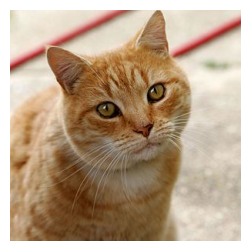

In [91]:
# Matplotlib: RGB / OpenCV: BGR  

img_color=cv2.imread('./Data/animal/cats/cat.jpg', cv2.IMREAD_COLOR)   # 컬러로 이미지 읽기
# img_r=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                          # 컬러이미지를 흑백으로

plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))   # BGR >> RGB
plt.axis('off')
plt.show()

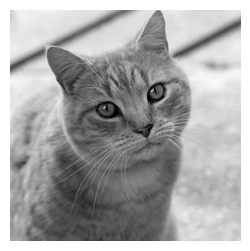

In [93]:
img_gray=cv2.imread('./Data/animal/cats/cat.jpg', cv2.IMREAD_GRAYSCALE)    # 흑백으로 이미지 읽기

plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))  # GRAY >> RGB
plt.axis('off')
plt.show()

## 이미지 연산

In [78]:
# 1) 이미지 크기와 픽셀 정보 

image=cv2.imread('./Data/animal/cats/cat.jpg', cv2.IMREAD_COLOR)  
image.shape, image.size      # 픽셀 수 및 이미지 크기 확인

((300, 300, 3), 270000)

In [72]:
px=image[100, 100]           # 이미지 Numpy 객체의 특정 픽셀(행, 열)
px                           # BGR 순으로 출력 (단, 흑백인 경우 구분되지 않음)

array([ 47,  96, 140], dtype=uint8)

In [74]:
px[2]                        # R값만 출력

140

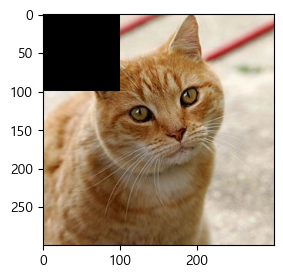

In [76]:
# 2) 특정 범위 픽셀 변경

image[0:100, 0:100]=[0, 0, 0]      # RGB(BGR) / 0 검정색 255 흰색
plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
plt.show()

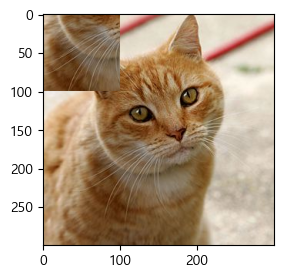

In [99]:
# 3) ROI(Region Of interest) : 관심 있는 영역 추출 및 복사

roi=image[150:250, 50:150]     # [행, 열]
image[0:100, 0:100]=roi

plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

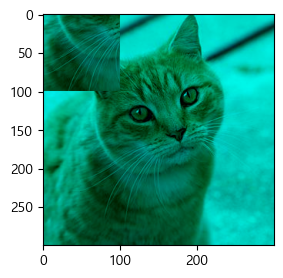

In [101]:
# 4) 픽셀별 색상 다루기 - 이미지의 모든 픽셀에서 빨간색(Red) 값을 0

image[:, :, 2]=0     # H*W*C(3) OpenCV는 BGR  0B, 1G, 2R
plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 변형
- 이미지의 크기를 조절 : cv2.resize(image, dsize, fx, fy, interpolation)
    - dsize: Manual Size
    - fx: 가로 비율
    - fy: 세로 비율
    - interpolation: 보간법
        - NTER_CUBIC 인터_큐브: 사이즈를 크게 할 때 주로 사용
        - INTER_AREA 인터_에어리어: 사이즈를 작게 할 때 주로 사용

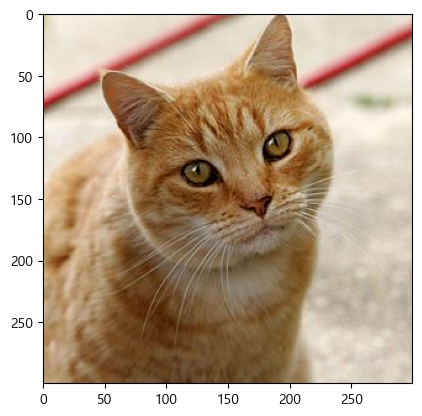

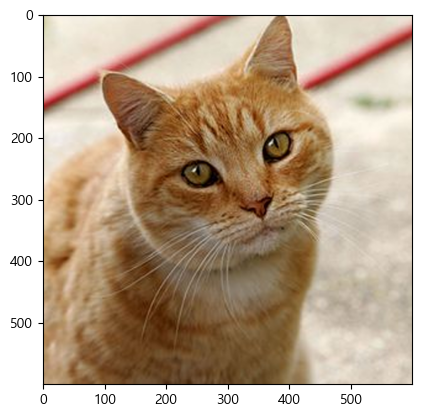

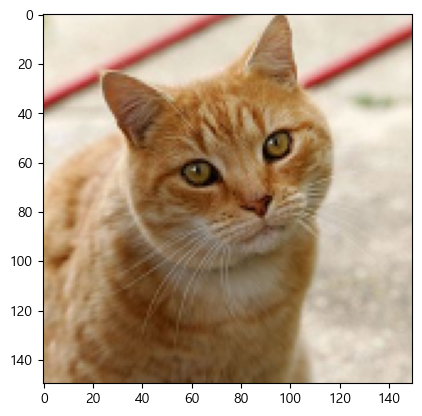

In [2]:
image=cv2.imread('./Data/animal/cats/cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
                                          
expand=cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)  # 2배 확대
# 또는 None는 dsize 지정하지 않음 / expand=cv2.resize(image, (500, 500), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

shrink=cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)  # 50% 축소
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

- cv2.warpAffine(image, M, dsize): 이미지의 위치를 변경합니다.
    - M: 변환 행렬
    - dsize: Manual Size

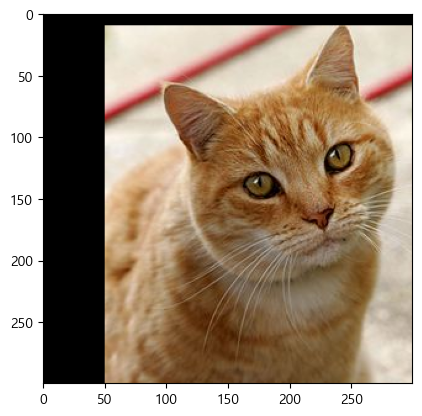

In [20]:
# image.shape (300, 300, 3)
h, w=image.shape[:2]
h, w    # 300, 300

M=np.float32([[1, 0, 50], [0, 1, 10]])      # 변환 행렬 (오른쪽 50,  아래로 10)
dst=cv2.warpAffine(image, M, (h, w))       
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

- cv2.getRotationMatrix2D(center, angle, scale): 이미지 회전을 위한 변환 행렬을 생성합니다.
    - center: 회전 중심
    - angle: 회전 각도
    - scale: Scale Factor / 크기조절

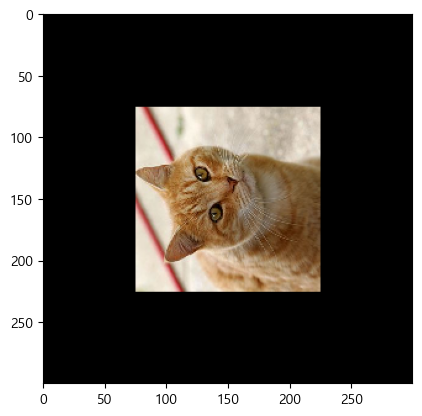

In [22]:
h, w=image.shape[:2] # 300, 300
M=cv2.getRotationMatrix2D((w/2, h/2), 90, 0.5)   # 변환 행렬, 각도, 축소
dst=cv2.warpAffine(image, M, (w, h))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 합치기
- cv2.add(): Saturation 연산을 수행합니다.
    - Saturation: 0보다 작으면 0, 255보다 크면 255로 표현
    - 즉, 255 초과하면 짜른다. (Clip이라고 부르는 연산과정)

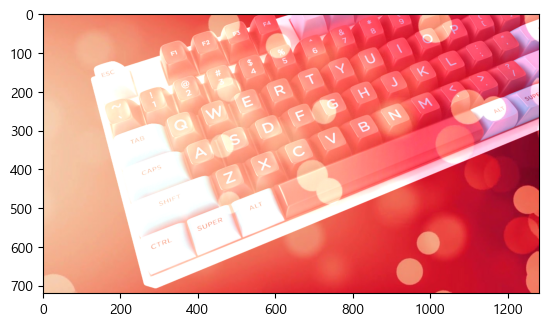

In [53]:
img1=cv2.imread('./Data/opencv/image_1.jpg')
img2=cv2.imread('./Data/opencv/image_2.png')

result=cv2.add(img1, img2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

## 임계점 처리
### 이진화
- 이진화 목적
    - 이미지에서 관심 있는 객체나 영역을 쉽게 분리하거나 단순화 하기 위함
    - 객체와 배경 구분 (흰 종이에 검정 글씨가 있는 경우, 글씨 객체 흑(0) / 배경색 백(255)
    - 이미지 단순화 : 0 ~ 255로 나누면 계산이 간단해짐 (윤곽선 추출, 모양 분석)
    - 노이즈 제거 효과 : 적절한 threshold 값을 선택하면 배경의 작은 노이즈를 무시하고 주요 객체만 남
- cv2.threshold(image, thresh, max_value, type): 임계값을 기준으로 흑/백으로 분류하는 함수
    - image: 처리할 Gray Scale 이미지
    - thresh: 임계 값 (전체 픽셀에 적용)
    - max_value: 임계 값을 넘었을 때 적용할 값
    - type: 임계점을 처리하는 방식
        - THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0
        - THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0
        - THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로
        - THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0
        - THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로

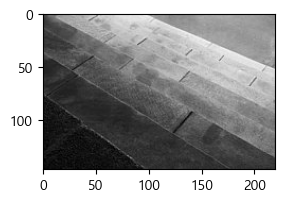

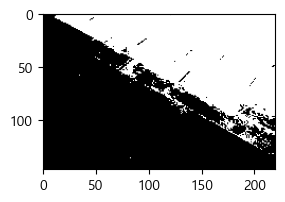

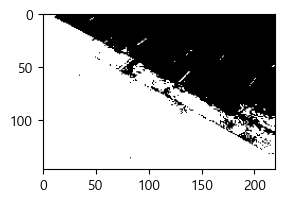

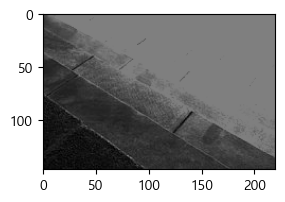

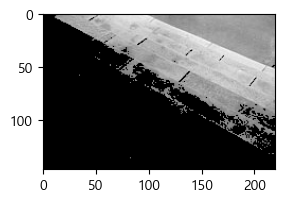

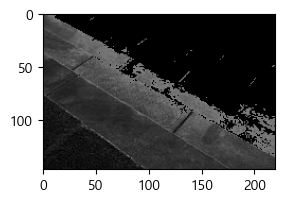

In [101]:
img=cv2.imread('./Data/opencv/gray_image.jpg', cv2.IMREAD_GRAYSCALE)   # 흑백 읽기  

imgs=[]
ret, thresh1=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)      # 임계값 127 < max_value(255) : 0
ret, thresh2=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)  # 임계값 127 > max_value(255) : 0
ret, thresh3=cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)       # 임계값 127 < 임계값(127) : 그대로
ret, thresh4=cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)      # 임계값 127 < 그대로 : 0
ret, thresh5=cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)  # 임계값 127 < 0 : 그대로
imgs.append(img)
imgs.append(thresh1)
imgs.append(thresh2)
imgs.append(thresh3)
imgs.append(thresh4)
imgs.append(thresh5)

for i in imgs:
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()


### 적응 임계점 
- 적응 임계점 개념
    - 하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용
    - 일반적인 임계점 처리(cv2.threshold)는 하나의 고정된 임계값을 전체 이미지에 적용
    - 적응 임계점은 **이미지의 각 영역(작은 블록)**마다 지역적으로 다른 임계값을 계산하여 적용
- cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C)
    - max_value: 임계 값을 넘었을 때 적용할 값
    - adaptive_method: 임계 값을 결정하는 계산 방법
    - ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정
    - ADAPTIVE_THRESH_GAUSSIAN_C
    - type: 임계점을 처리하는 방식
        - block_size: 임계 값을 적용할 영역의 크기
        - C: 평균이나 가중 평균에서 차감할 값
- Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않는다.

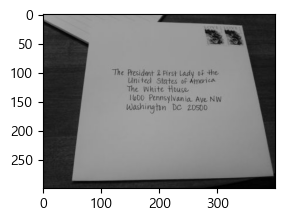

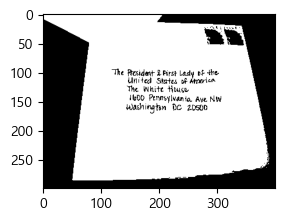

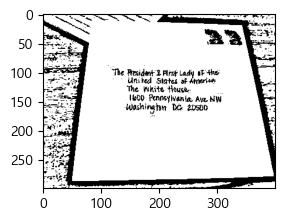

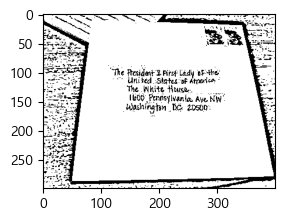

In [107]:
img=cv2.imread('./Data/opencv/hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)

img_list=[]
ret, thresh1=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)      

thresh2=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3) 
thresh3=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)  

img_list.append(img)
img_list.append(thresh1)
img_list.append(thresh2)
img_list.append(thresh3)

for i in img_list:
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()

## 도형 그리기

### 직선 그리기
- cv2.line(image, start, end, color, thickness): 하나의 직선을 그리는 함수
    - start: 시작 좌표 (2차원)
    - end: 종료 좌표 (2차원)
    - thickness: 선의 두께

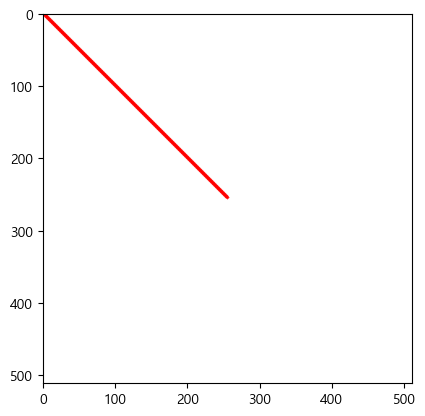

In [128]:
box=np.full((512, 512, 3), 255, np.uint8)  
box

line=cv2.line(box, (0, 0), (255, 255), (255, 0, 0), 3)  # 좌측상단모서리, 중간대각선지점, 선의색상, 선의두께
plt.imshow(line)
plt.show()

### 사각형 그리기
- cv2.rectangle(image, start, end, color, thickness): 하나의 사각형을 그리는 함수
    - start: 시작 좌표 (2차원)
    - end: 종료 좌표 (2차원)
    - thickness: 선의 두께 (채우기: -1)

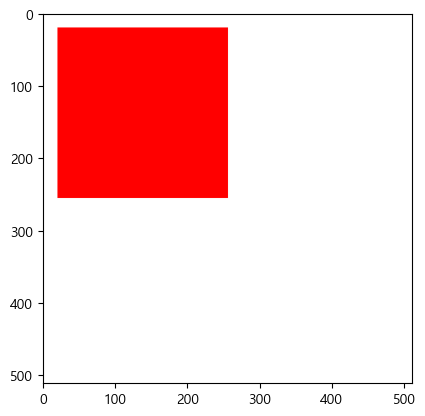

In [139]:
box=np.full((512, 512, 3), 255, np.uint8) 
rect=cv2.rectangle(box, (20, 20), (255, 255), (255, 0, 0), -1)
plt.imshow(rect)
plt.show()

### 원 그리기
- cv2.circle(image, center, radian, color, thickness): 하나의 원을 그리는 함수
    - center: 원의 중심 (2차원)
    - radian: 반지름
    - thickness: 선의 두께 (채우기: -1)

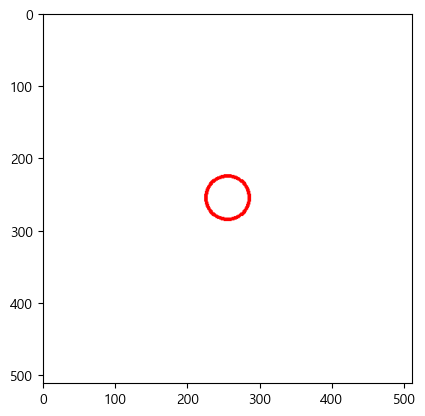

In [144]:
box=np.full((512, 512, 3), 255, np.uint8) 
cir=cv2.circle(box, (255, 255), 30, (255, 0, 0), 3)
plt.imshow(cir)
plt.show()

### 다각형 그리기
- cv2.polylines(image, points, is_closed, color, thickness): 하나의 다각형을 그리는 함수
    - points: 꼭지점들
    - is_closed: 닫힌 도형 여부
    - thickness: 선의 두께 (채우기: -1)

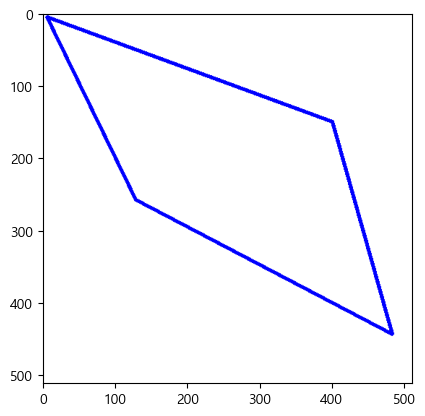

In [78]:
box=np.full((512, 512, 3), 255, np.uint8) 
point=np.array([[5, 5], [128, 258], [483, 444], [400, 150]])  # 왼쪽 위, 중간 왼쪽 아래, 오른쪽 아래, 오른쪽 위
poly=cv2.polylines(box, [point], True, (0, 0, 255), 4)
plt.imshow(poly)
plt.show()

### 텍스트 그리기
- cv2.putText(image, text, position, font_type, font_scale, color): 하나의 텍스트를 그리는 함수
    - position: 텍스트가 출력될 위치
    - font_type: 글씨체
    - font_scale: 글씨 크기 가중치 (글씨 크기)

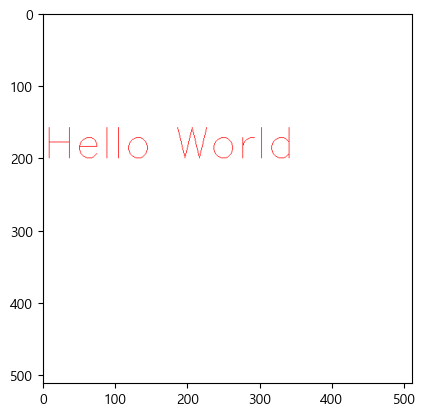

In [81]:
box=np.full((512, 512, 3), 255, np.uint8) 
txt=cv2.putText(box, 'Hello World', (0, 200), cv2.FONT_ITALIC, 2, (255, 0, 0))
plt.imshow(txt)
plt.show()

## Contours
- 외곽 : 그림 안에서 어떠한 사물의 그 테투리를 구분하고자 할때
- cv2.findContours(image, mode, method): 이미지에서 Contour들을 찾는 함수
    - mode: Contour들을 찾는 방법
        - RETR_EXTERNAL: 바깥쪽 Line만 찾기
        - RETR_LIST: 모든 Line을 찾지만, Hierarchy(계층 정보)구성 X
        - RETR_TREE: 모든 Line을 찾으며, 모든 Hierarchy(계층 정보) 구성 O / 상속관계(중첩시)
    - method: Contour들을 찾는 근사치 방법
        - CHAIN_APPROX_NONE: 모든 Contour 포인트 저장
        - CHAIN_APPROX_SIMPLE: Contour Line을 그릴 수 있는 포인트만 저장
- cv2.drawContours(image, contours, contour_index, color, thickness): Contour들을 그리는 함수
    - 입력 이미지는 Gray Scale Threshold 전처리 과정이 필요
    - contour_index: 그리고자 하는 Contours Line (전체: -1)

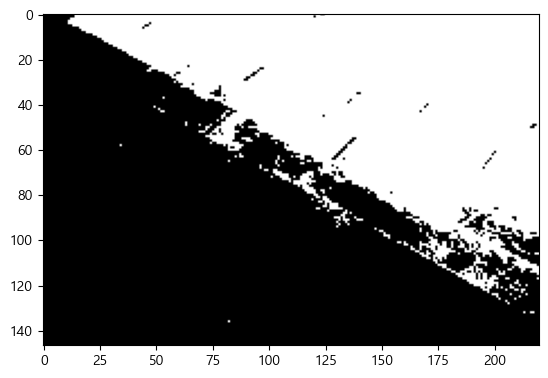

<function matplotlib.pyplot.show(close=None, block=None)>

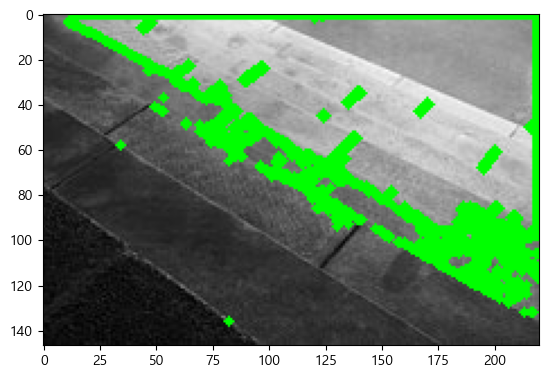

In [84]:
img=cv2.imread('./Data/opencv/gray_image.jpg')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진화
ret, thresh=cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)    # 임계값 127 < max_value(255) / 0
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR))
plt.show()

# 이진화 >> 윤곽선 
contours, _=cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # 모든 컨투어, 포인터 

# 윤곽선 그리기 >> img, contours
draw_contours=cv2.drawContours(img, contours, -1, (0, 255, 0), 4)  # index -1, 0, 1 넣어보기
plt.imshow(cv2.cvtColor(draw_contours, cv2.COLOR_BGR2RGB))
plt.show

### 다양한 형태의 외곽 찾기

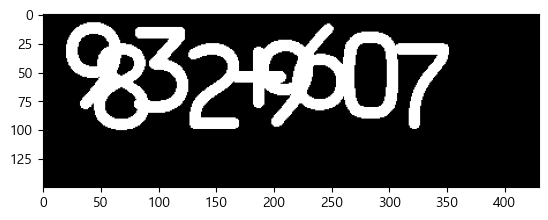

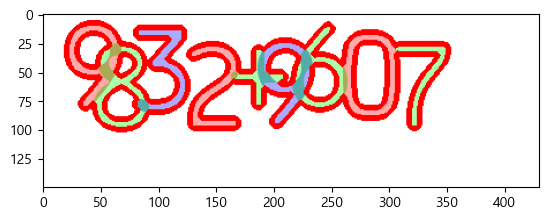

In [143]:
img=cv2.imread('./Data/opencv/digit_image.png')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진화
ret, thresh=cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)    # 임계값 230 < max_value(255) / 0
thresh=cv2.bitwise_not(thresh)                                      # findContours 흰색으로 나오게 
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

# 이진화 >> 윤곽선 
contours, _=cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # 모든 컨투어, 포인터 

# 윤곽선 그리기 >> img, contours
draw_contours=cv2.drawContours(img, contours, -1, (0, 0, 255), 4)    # idx 0, 1, 2
plt.imshow(cv2.cvtColor(draw_contours, cv2.COLOR_BGR2RGB))
plt.show()

- 사각형 외곽 찾기
- cv2.boundingRect(contour): Contour를 포함하는 사각형을 그립니다.
    - 사각형의 X, Y 좌표와 너비, 높이를 반환

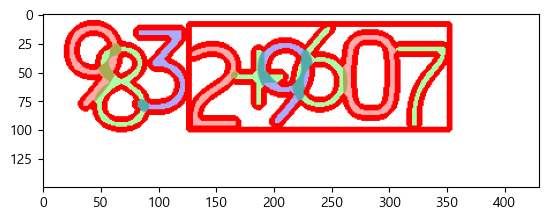

In [146]:
# 첫 번째 윤곽선(contour)의 경계 사각형(bounding box)
contour=contours[0]   
x, y, w, h=cv2.boundingRect(contour)
img_rect=cv2.rectangle(draw_contours, (x, y), (x + w, y + h), (0, 0, 255), 3)   # 상단좌표, 너비, 높이
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
plt.show()

- 다각형 외곽 찾기
    - cv2.convexHull(contour): Convex Hull 알고리즘으로 외곽을 구하는 함수
    - 대략적인 형태의 Contour 외곽을 빠르게 구할 수 있다. (단일 Contour 반환)

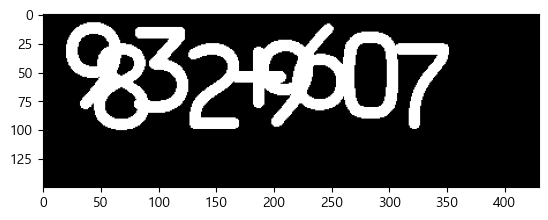

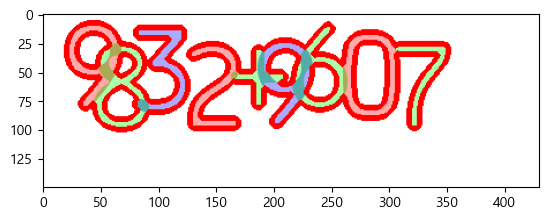

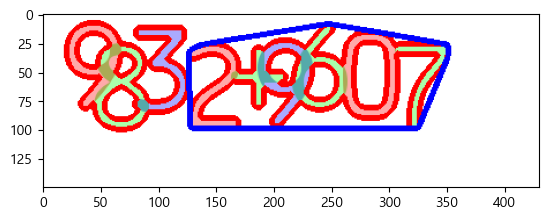

In [100]:
img=cv2.imread('./Data/opencv/digit_image.png')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진화
ret, thresh=cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)    # 임계값 230 < max_value(255) / 0
thresh=cv2.bitwise_not(thresh)                                      # findContours 흰색으로 나오게 
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

# 이진화 >> 윤곽선 
contours, _=cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # 모든 컨투어, 포인터 

# 윤곽선 그리기 >> img, contours
draw_contours=cv2.drawContours(img, contours, -1, (0, 0, 255), 4)    # idx 0, 1, 2
plt.imshow(cv2.cvtColor(draw_contours, cv2.COLOR_BGR2RGB))
plt.show()

contour=contours[0]
hull=cv2.convexHull(contour) # 볼록 외형을 계산
img_hull=cv2.drawContours(draw_contours, [hull], -1, (255, 0, 0), 4)
plt.imshow(cv2.cvtColor(img_hull, cv2.COLOR_BGR2RGB))
plt.show()

- 유사 다각형 외곽 찾기
- cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구합니다.
    - curve: Contour
    - epsilon: 최대 거리 (클수록 Point 개수 감소)
    - closed: 폐곡선 여부

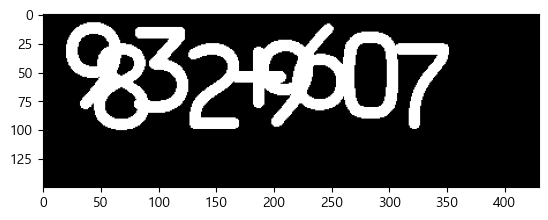

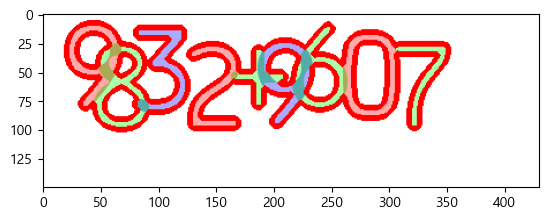

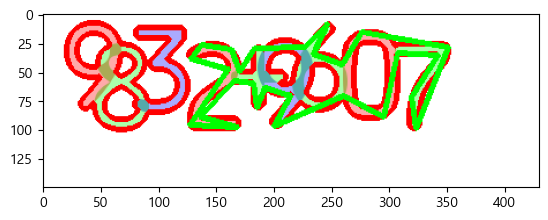

In [154]:
img=cv2.imread('./Data/opencv/digit_image.png')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진화
ret, thresh=cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)    # 임계값 230 < max_value(255) / 0
thresh=cv2.bitwise_not(thresh)                                      # findContours 흰색으로 나오게 
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

# 이진화 >> 윤곽선 
contours, _=cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # 모든 컨투어, 포인터 

# 윤곽선 그리기 >> img, contours
draw_contours=cv2.drawContours(img, contours, -1, (0, 0, 255), 4)    # idx 0, 1, 2
plt.imshow(cv2.cvtColor(draw_contours, cv2.COLOR_BGR2RGB))
plt.show()

contour=contours[0]
epsilon=0.01 * cv2.arcLength(contour, True)      # 윤곽선의 길이 계산 0.01 정밀도 , true(닫힌) 
approx=cv2.approxPolyDP(contour, epsilon, True)   # 다각형으로 근사
img_approx=cv2.drawContours(draw_contours, [approx], -1, (0, 255, 0), 4)
plt.imshow(cv2.cvtColor(img_approx, cv2.COLOR_BGR2RGB))
plt.show()

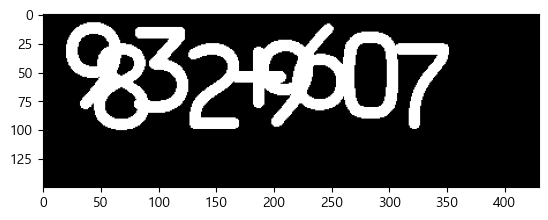

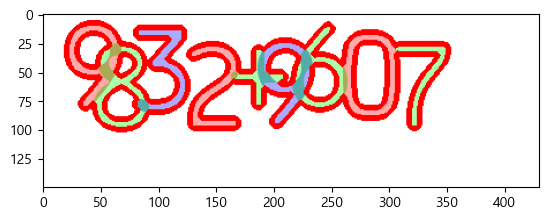

9637.5
1112.1046812534332
{'m00': 9637.5, 'm10': 2328654.1666666665, 'm01': 525860.6666666666, 'm20': 592439950.25, 'm11': 125395340.54166666, 'm02': 32616659.75, 'm30': 157199366984.05002, 'm21': 31597487112.5, 'm12': 7677332730.433333, 'm03': 2223038890.5, 'mu20': 29780523.227014065, 'mu11': -1665373.5978347063, 'mu02': 3923591.96819859, 'mu30': -339915780.7390442, 'mu21': 76375946.41720533, 'mu12': -21905836.49518633, 'mu03': 15169233.760740757, 'nu20': 0.3206295471760697, 'nu11': -0.01793010748946005, 'nu02': 0.04224302932750429, 'nu30': -0.03727866486560947, 'nu21': 0.008376172780476334, 'nu12': -0.0024024196097321344, 'nu03': 0.001663614382378067}


In [158]:
img=cv2.imread('./Data/opencv/digit_image.png')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진화
ret, thresh=cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)    # 임계값 230 < max_value(255) / 0
thresh=cv2.bitwise_not(thresh)                                      # findContours 흰색으로 나오게 
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

# 이진화 >> 윤곽선 
contours, _=cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # 모든 컨투어, 포인터 

# 윤곽선 그리기 >> img, contours
draw_contours=cv2.drawContours(img, contours, -1, (0, 0, 255), 4)    # idx 0, 1, 2
plt.imshow(cv2.cvtColor(draw_contours, cv2.COLOR_BGR2RGB))
plt.show()

contour=contours[0]
area=cv2.contourArea(contour)         # 면적 
print(area)

length=cv2.arcLength(contour, True)   # 둘레
print(length)

M=cv2.moments(contour)               # 특징 딕셔너리 형태로 : 면적, 좌표, 기울기 및 회전 등등
print(M) 

## Filtering
- 이미지에 커널을 적용하여 이미지를 흐리게(Blurring = Smoothing) 처리할 수 있습니다.
- 이미지를 흐리게 만들면 노이즈 및 손상을 줄일 수 있습니다.
- 특정한 이미지에서 커널(Kernel)을 적용해 컨볼루션 계산하여 필터링을 수행할 수 있습니다.

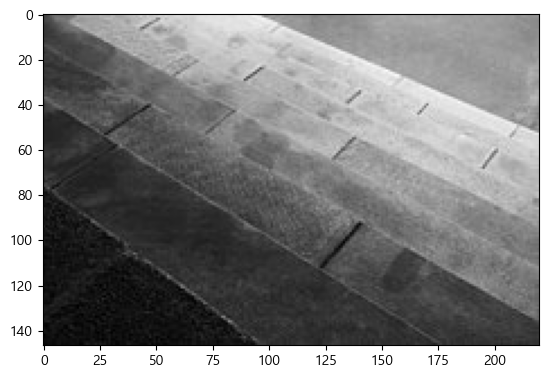

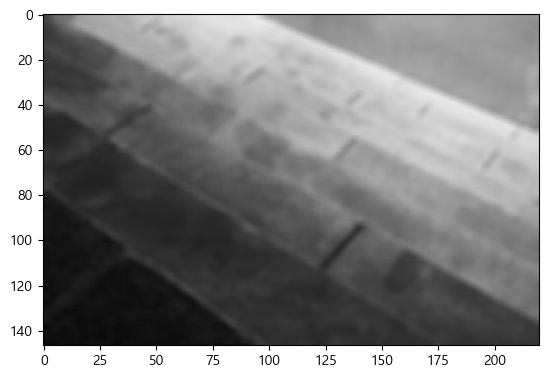

In [63]:
img=cv2.imread('./Data/opencv/gray_image.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 4×4 영역  >> 평균/16 = 값
dst=cv2.blur(img, (4, 4))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

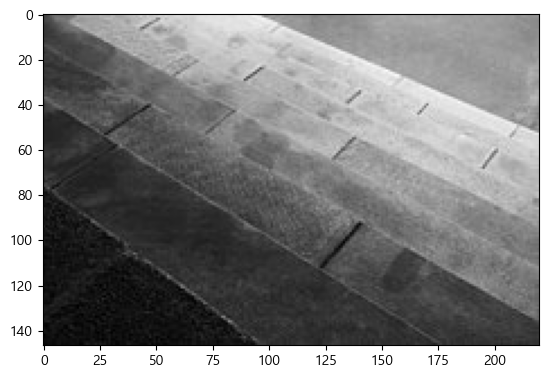

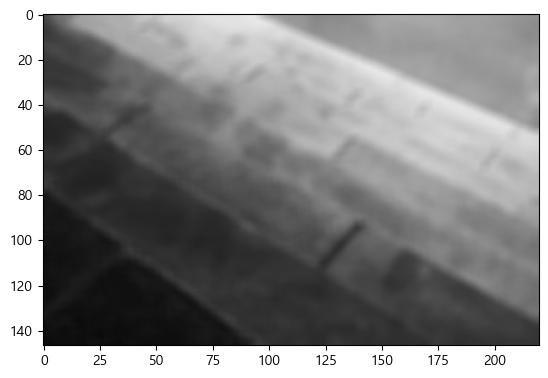

In [67]:
img=cv2.imread('./Data/opencv/gray_image.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# kernel_size: 홀수
dst=cv2.GaussianBlur(img, (5, 5), 10)       # 10:표준편차 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()